# 6.1.4 Generate Random Latitudes and Longitudes

In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

# 6.1.5: Generate Random World Cities

In [4]:
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count.
len(cities)

602

# 6.2.6: Get the City Weather Data

In [6]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4207db3a377792eb24c750378dd88d03


In [9]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4207db3a377792eb24c750378dd88d03&q=Boston


In [10]:
# Make a 'Get' request for the city weather.
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [11]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + "i"

Beginning Data Retrieval     
-----------------------------


In [12]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 13 | hithadhoo
Processing Record 2 of Set 13 | port elizabeth
Processing Record 3 of Set 13 | sinazongwe
Processing Record 4 of Set 13 | capoterra
Processing Record 5 of Set 13 | rikitea
Processing Record 6 of Set 13 | vaini
Processing Record 7 of Set 13 | aklavik
Processing Record 8 of Set 13 | dikson
Processing Record 9 of Set 13 | yenagoa
Processing Record 10 of Set 13 | illoqqortoormiut
City not found. Skipping...
Processing Record 11 of Set 13 | bluff
Processing Record 12 of Set 13 | mucurapo
Processing Record 13 of Set 13 | mataura
Processing Record 14 of Set 13 | albany
Processing Record 15 of Set 13 | yellowknife
Processing Record 16 of Set 13 | mar del plata
Processing Record 17 of Set 13 | puerto ayora
Processing Record 18 of Set 13 | new norfolk
Processing Record 19 of Set 13 | hobart
Processing Record 20 of Set 13 | provideniya
Processing Record 21 of Set 13 | busselton
Processing Record 22 of Set 13 | tiksi
Processing Record 23 of Set 13 | barrow

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hithadhoo,-0.60,73.08,83.03,70,50,9.71,MV,2020-03-31 21:59:12
1,Port Elizabeth,-33.92,25.57,62.60,77,26,12.75,ZA,2020-03-31 21:59:13
2,Sinazongwe,-17.26,27.46,74.26,59,3,0.96,ZM,2020-03-31 21:59:13
3,Capoterra,39.18,8.97,59.00,93,99,1.12,IT,2020-03-31 21:59:13
4,Rikitea,-23.12,-134.97,78.69,73,100,8.08,PF,2020-03-31 21:59:13
5,Vaini,-21.20,-175.20,80.60,83,40,2.24,TO,2020-03-31 21:59:13
6,Aklavik,68.22,-135.01,15.80,36,5,13.87,CA,2020-03-31 21:50:39
7,Dikson,73.51,80.55,-2.52,93,100,6.62,RU,2020-03-31 21:59:13
8,Yenagoa,4.92,6.26,79.63,88,100,3.40,NG,2020-03-31 21:59:14
9,Bluff,-46.60,168.33,51.01,98,31,4.07,NZ,2020-03-31 21:59:14


In [14]:
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hithadhoo,MV,2020-03-31 21:59:12,-0.60,73.08,83.03,70,50,9.71
1,Port Elizabeth,ZA,2020-03-31 21:59:13,-33.92,25.57,62.60,77,26,12.75
2,Sinazongwe,ZM,2020-03-31 21:59:13,-17.26,27.46,74.26,59,3,0.96
3,Capoterra,IT,2020-03-31 21:59:13,39.18,8.97,59.00,93,99,1.12
4,Rikitea,PF,2020-03-31 21:59:13,-23.12,-134.97,78.69,73,100,8.08
...,...,...,...,...,...,...,...,...,...
548,Chiang Mai,TH,2020-03-31 22:00:40,18.79,98.98,73.40,53,6,2.24
549,Belluru,IN,2020-03-31 22:00:40,12.99,76.74,72.99,37,0,5.66
550,Colquiri,BO,2020-03-31 22:00:40,-17.42,-67.13,48.79,22,97,9.73
551,Sebring,US,2020-03-31 22:00:40,27.50,-81.44,87.80,48,75,23.04


In [15]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

# 6.3.1: Plot Latitude vs. Temperature

In [16]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [17]:
# Import the time module.
import time

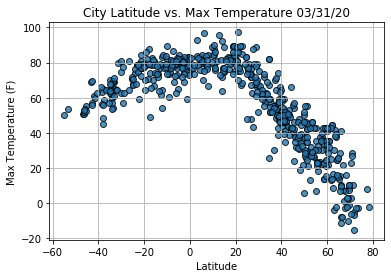

In [18]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

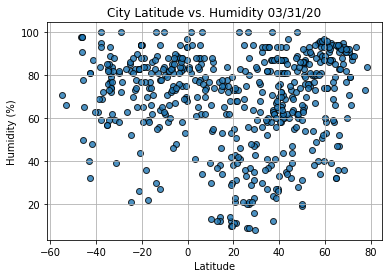

In [19]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

# 6.3.3: Plot Latitude vs. Cloudiness

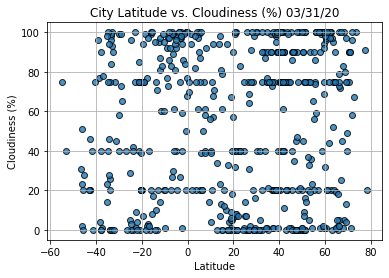

In [20]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

# 6.3.4: Plot Latitude vs. Wind Speed

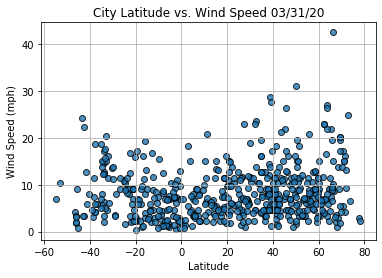

In [21]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

# 6.4.2: Find the Correlation Between Latitude and Maximum Temperature

In [22]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [29]:
# Create a function to create perform linear regression on the weather data and plot a regression line and the equation with the data.  
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [30]:
index13 = city_data_df.loc[13]
index13

City                  Yellowknife
Country                        CA
Date          2020-03-31 21:57:09
Lat                         62.46
Lng                       -114.35
Max Temp                      8.6
Humidity                       39
Cloudiness                     20
Wind Speed                   6.93
Name: 13, dtype: object

In [31]:
city_data_df["Lat"] >= 0

0      False
1      False
2      False
3       True
4      False
       ...  
548     True
549     True
550    False
551     True
552     True
Name: Lat, Length: 553, dtype: bool

In [32]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
3,Capoterra,IT,2020-03-31 21:59:13,39.18,8.97,59.00,93,99,1.12
6,Aklavik,CA,2020-03-31 21:50:39,68.22,-135.01,15.80,36,5,13.87
7,Dikson,RU,2020-03-31 21:59:13,73.51,80.55,-2.52,93,100,6.62
8,Yenagoa,NG,2020-03-31 21:59:14,4.92,6.26,79.63,88,100,3.40
10,Mucurapo,TT,2020-03-31 21:59:14,10.67,-61.53,84.20,54,75,11.41
...,...,...,...,...,...,...,...,...,...
547,Muros,ES,2020-03-31 21:58:16,42.78,-9.06,51.01,93,20,5.82
548,Chiang Mai,TH,2020-03-31 22:00:40,18.79,98.98,73.40,53,6,2.24
549,Belluru,IN,2020-03-31 22:00:40,12.99,76.74,72.99,37,0,5.66
551,Sebring,US,2020-03-31 22:00:40,27.50,-81.44,87.80,48,75,23.04


In [33]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

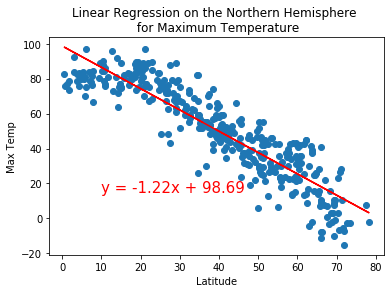

In [50]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values, "Linear Regression on the Northern Hemisphere \n for Maximum Temperature", 'Max Temp', (10,15))

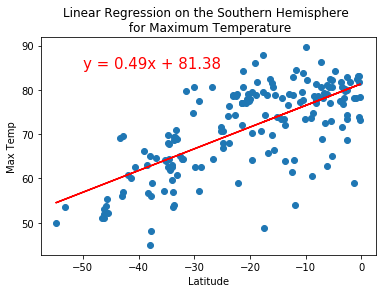

In [49]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,85))

# 6.4.3: Find the Correlation Between Latitude and Percent Humidity

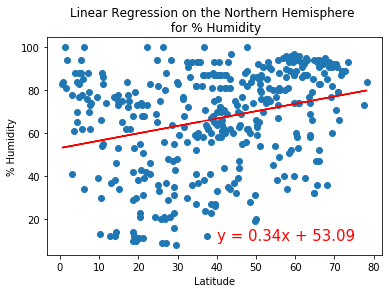

In [37]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

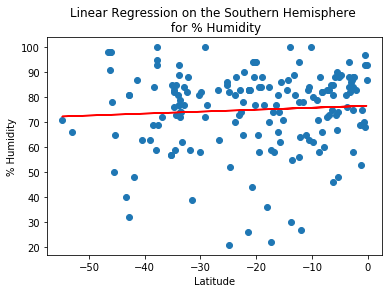

In [38]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

# 6.4.4: Find the Correlation Between Latitude and Percent Cloudiness

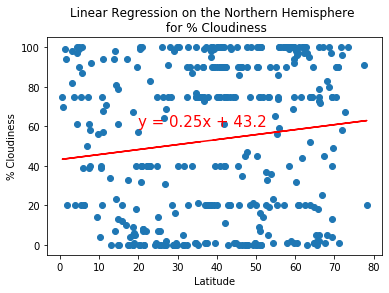

In [46]:
# SKILL DRILL
#1. Refactor the code we have been using for linear regression lines and plots to create the x- and y-values for the percent cloudiness and latitudes on the Northern Hemisphere DataFrame.
#2. Call the plot_linear_regression function with the correct arguments to create the linear regression line and plot for percent cloudiness in the Northern Hemisphere. It should look like the following plot.

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(20,60))


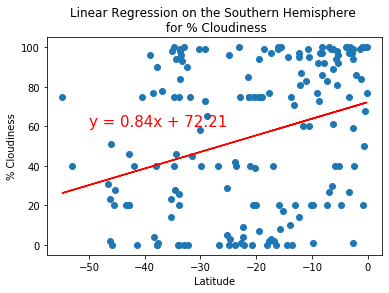

In [43]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

# 6.4.5: Find the Correlation Between Latitude and Wind Speed

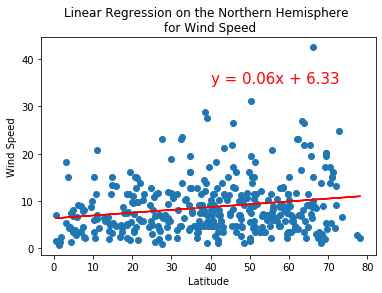

In [51]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

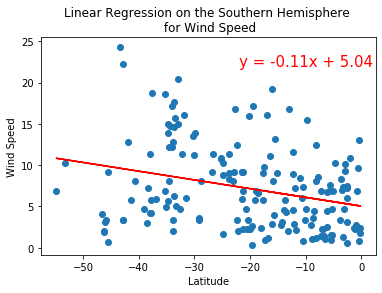

In [54]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-22,22))